# TODO
- (argmax, max) per speedup e scalabilita
- qualcosa vs dimensione collezione (n) per vedere la gustafson legge

In [146]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [147]:
results_df = pd.read_csv("../Statistics/service_time_trial.csv")
results_df.head()

,max_nw,active_workers_history,service_time_history,service_time_goal,emitter_elapsed_time_history,workers_elapsed_time_history,collector_elapsed_time_history
0,8,1,25,1000,175,1036,1108
1,8,1,100,1000,1,1037,0
2,8,1,147,1000,1072,1050,1036
3,8,1,192,1000,2,1050,0
4,8,1,234,1000,1048,1044,1051


### Service Time History

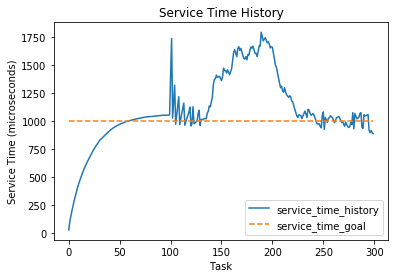

In [148]:
# plot servive_time_history vs service_time_goal
results_df.plot(y=['service_time_history', 'service_time_goal'],
                style=['-', '--'])
plt.ylabel('Service Time (microseconds)')
plt.xlabel('Task')
plt.title('Service Time History')
plt.show()

### Service Time Error

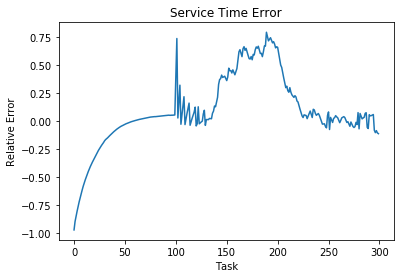

In [149]:
# plot relative error between  service_time_goal and service_time_history
y1 = np.array(results_df['service_time_history'])
y2 = np.array(results_df['service_time_goal'])

relative_error = (y1-y2)/y2

plt.plot(relative_error)
plt.ylabel('Relative Error')
plt.xlabel('Task')
plt.title('Service Time Error')
plt.show()

### Parallelism Degree

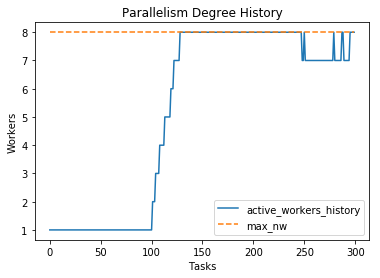

In [150]:
# plot parallelism degree vs max nw
results_df.plot(y=['active_workers_history', 'max_nw'],
                style=['-', '--'])
plt.ylabel('Workers')
plt.xlabel('Tasks')
plt.title('Parallelism Degree History')
plt.show()

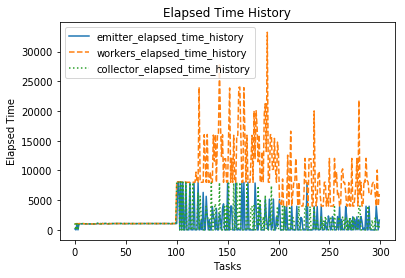

In [151]:
# plot emitter, workers and collector elapsed time history
results_df.plot(y=['emitter_elapsed_time_history','workers_elapsed_time_history','collector_elapsed_time_history'],
                style=['-', '--', ':'])
plt.ylabel('Elapsed Time')
plt.xlabel('Tasks')
plt.title('Elapsed Time History')
plt.show()

### Completion Time

In [152]:
tc_vs_nw_df = pd.read_csv('../Statistics/completion_time_vs_nw.csv')
tc_vs_nw_df.head()

,nw,completion_time
0,1,1310259
1,2,656521
2,3,436339
3,4,329027
4,5,324921


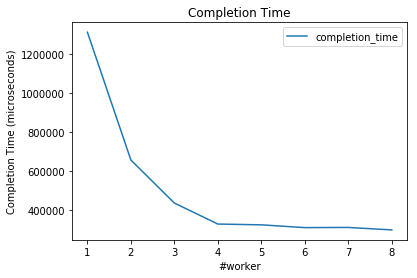

In [153]:
tc_vs_nw_df.plot(x='nw', y='completion_time', style='-')
plt.xlabel('#worker')
plt.ylabel('Completion Time (microseconds)')
plt.title('Completion Time')
plt.show()

### Scalability

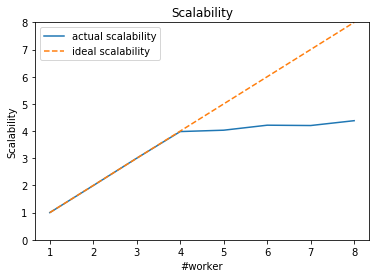

In [154]:
# scalability
tc = tc_vs_nw_df['completion_time']
nw = tc_vs_nw_df['nw']

scalability = [tc[0]/float(t) for t in tc]

plt.plot(nw, scalability, linestyle='-', label='actual scalability')
plt.plot(nw, nw, linestyle='--', label='ideal scalability')
plt.legend(loc='best')
plt.xlabel('#worker')
plt.ylabel('Scalability')
plt.ylim([0, np.max(nw)])
plt.title('Scalability')
plt.show()

In [155]:
n_worker, max_scalability = np.argmax(scalability), np.max(scalability)
print("max scalability:", round(max_scalability,4), "obtained with", n_worker+1, "workers")

max scalability: 4.3825 obtained with 8 workers


### Speedup

In [156]:
# speedup
sequential_time = pd.read_csv('../Statistics/sequential_time.csv')
sequential_time

,sequential_time
0,1300020


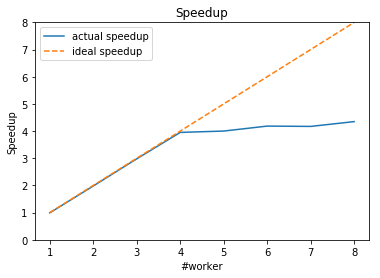

In [157]:
tseq = sequential_time['sequential_time']
speedup = [tseq/float(t) for t in tc]

plt.plot(nw, speedup, linestyle='-', label='actual speedup')
plt.plot(nw, nw, linestyle='--', label='ideal speedup')
plt.legend(loc='best')
plt.xlabel('#worker')
plt.ylabel('Speedup')
plt.ylim([0, np.max(nw)])
plt.title('Speedup')
plt.show()

In [158]:
n_worker, max_speedup = np.argmax(speedup), np.max(speedup)
print("max speedup:", round(max_speedup,4), "obtained with", n_worker+1, "workers")

max speedup: 4.3483 obtained with 8 workers


### Alpha
- colonna 1: alpha
- colonna 2: ts_goal
- colonna 3-fine: service_time_history

In [159]:
ts_vs_alpha_df = pd.read_csv("../Statistics/service_time_history_vs_alpha.csv", header=None)
ts_vs_alpha_df.head()

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
0,0.05,1000,25,98,143,188,231,269,307,343,...,1029,1006,984,1021,1056,1089,1005,979,955,958
1,0.10,1000,50,191,278,356,427,485,537,584,...,1041,1097,1067,1040,1016,1047,689,670,653,639
2,0.15,1000,75,280,388,480,566,637,697,748,...,1170,1031,1017,1117,901,880,825,844,793,825
3,0.20,1000,149,439,851,882,907,926,942,955,...,1007,1011,947,986,790,833,868,897,838,793
4,0.25,1000,126,442,582,690,769,828,882,922,...,1009,1009,1007,1006,1005,1004,1003,501,501,502


- prova per n differenti

[]

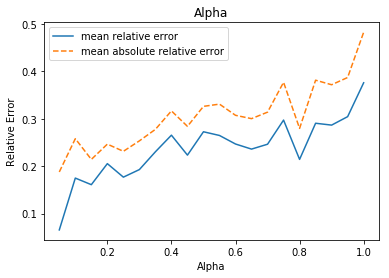

In [160]:
#ts_vs_alpha_df.loc[0, 1:]
alpha_values = ts_vs_alpha_df.loc[:,0]
ts_goal = ts_vs_alpha_df.loc[0,1]

ts_histories = np.array(ts_vs_alpha_df.loc[:, 2:])
n_alpha, n_tasks = ts_histories.shape

ts_goal = np.full((n_tasks),ts_goal)

rel_errors = np.array([(ts - ts_goal)/ts_goal for ts in ts_histories])

mean_rel_error = np.mean(rel_errors, 1)
mean_abs_rel_error = np.mean(np.abs(rel_errors), 1)

plt.plot(alpha_values, mean_rel_error, label='mean relative error', linestyle='-')
plt.plot(alpha_values, mean_abs_rel_error, label='mean absolute relative error', linestyle='--')
plt.legend(loc='best')
plt.xlabel('Alpha')
plt.ylabel('Relative Error')
plt.title('Alpha')
plt.plot()

In [161]:
print("min rel error:", round(np.min(mean_rel_error),4), "obtained with alpha:", alpha_values[np.argmin(mean_rel_error)])
print("min abs rel error:", round(np.min(mean_abs_rel_error),4), "obtained with alpha:", alpha_values[np.argmin(mean_abs_rel_error)])

min rel error: 0.0656 obtained with alpha: 0.05
min abs rel error: 0.1879 obtained with alpha: 0.05
